# Captone Project - Severity of car accidents

### Applied Data Science Capstone by IBM/Coursera

## Table of Content
* [Introduction: Business Problem](#introduction)
* [Data](#Data)
* [Analysis](#Analysis)
* [Results and Discussion](#results)
* [Conclusion](#Conclusion)

## 1. Introduction: Business Problem

Road traffic accidents (RTAs) and subsequent injuries have a remarkable social impact and are one of the leading causes of death and non-fatal injuries across the globe.

In this project, we will **predict severity of a car accident in Seattle, USA,** based on the attributes **weather and road conditions**

We will correlate different degrees of injury severity with the above mentioned variables. Knowing which factors contribute more to severe car accident conditions will help improve the quality of road conditions as well as setting up more measures to limit or timely announce the status of weather conditions

## Data

Based on definition of our problem, factors that will influence our decission are:
* weather conditions
* road conditions


(Initially, speeding was considered as one of the attributes to analyze but due to the vast number of missing values that variable was withdrawn from the analysis).

The data used for this study comprises a csv file and metadata from **all collisions in Seattle** provided by the Seattle Police Department (SPD) and recorded by Traffic Records **from 2004 to Present**. The data analysed will involve specifically car accidents. 

### Let's have a look at the data. Load dataset from a csv file

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('G:\Irene\Courses\Python\Applied Data Science Capstone\My Capstone Project\Data-Collisions.csv')
data.head()

C:\Users\Irene\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
data.shape

(194673, 38)

Our dataset includes 194672 (rows) observations and 37 attributes (columns)

## Data Visualization and Preprocessing

Let's see how many of each class in the severity group is in our dataset

In [3]:
data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

As we can see, in our dataset car accidents caused 136485 prop damages and 58188 injuries. The data are unbalanced

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

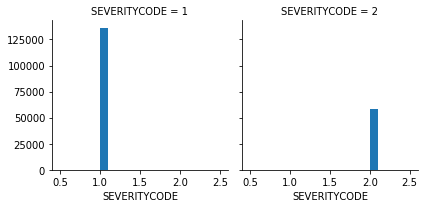

In [5]:
x = data.SEVERITYCODE

g = sns.FacetGrid(data, col="SEVERITYCODE")
g.map(plt.hist, 'SEVERITYCODE')


plt.show()


In [6]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Since we don't need most of the columns for our analyses, I am creating a new working variable named "df", which includes only the data I am interested in for later analyses

In [8]:
df = data[['SEVERITYCODE','WEATHER','ROADCOND']]
df.head(10)

,SEVERITYCODE,WEATHER,ROADCOND
0,2,Overcast,Wet
1,1,Raining,Wet
2,1,Overcast,Dry
3,1,Clear,Dry
4,2,Raining,Wet
5,1,Clear,Dry
6,1,Raining,Wet
7,2,Clear,Dry
8,1,Clear,Dry
9,2,Clear,Dry


SeverityCode is and int64, but the attributes "Weather" and "Roadcond" are object types. We need to transform them into categorical variables

#### How does weather affect severity of car accidents?

In [9]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

#### Feature before hot encoding

In [10]:
df[['WEATHER','ROADCOND']].head()

,WEATHER,ROADCOND
0,Overcast,Wet
1,Raining,Wet
2,Overcast,Dry
3,Clear,Dry
4,Raining,Wet


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [11]:
dummyweather = pd.get_dummies(df.WEATHER)
dummyroadcond = pd.get_dummies(df.ROADCOND)
Feature = pd.concat([dummyweather,dummyroadcond], axis=1)
Feature.head()

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Check for missing values

In [12]:
print (df.SEVERITYCODE.isnull())

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
194643    False
194644    False
194645    False
194646    False
194647    False
194648    False
194649    False
194650    False
194651    False
194652    False
194653    False
194654    False
194655    False
194656    False
194657    False
194658    False
194659    False
194660    False
194661    False
194662    False
194663    False
194664    False
194665    False
194666    False
194667    False
194668    False
194669    False
194670    False
194671    False
194672    False
Name: SEVERITYCODE, Leng

In [13]:
print (df.isnull().sum())

SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
dtype: int64


Although there are not missing values in the "Severitycode" column, there are 5081 missing values in "Weather" and 5012 missing values in "Roadcond". I am dropping the rows with missing values, since the total number of observations is quite high and enough to build a model

In [14]:
df.dropna(inplace=True)

C:\Users\Irene\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
print (df.isnull().sum())

SEVERITYCODE    0
WEATHER         0
ROADCOND        0
dtype: int64


#### Feature Selection

Let's define Feature set, X, for the future Classification models

In [16]:
X = Feature #(Feature includes dummy variables of weather and road condition)
X[0:5]

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


And define our labels

In [17]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)